## What to do:
- change tower_labels to space-separated list of tags
- relook at using the feature extraction/svm - it's kinda the same format as the original x array

## Data - Prep

In [1]:
    
#initial imports
import os
import random
import numpy as np
import pandas as pd
import json
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import keras
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
%matplotlib inline
    
    
# vgg16 transfer learning on the planet dataset
import sys
from numpy import load
from matplotlib import pyplot
from keras import backend
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

In [2]:

######################################################################################################
#####################################################################################################
#getting data ready
#create a dataframe containing the names of all of the jpgs in the full dataset
fileList = []
for file in os.listdir('C:/Users/miapi/Downloads/ttpla_dataset/sized_data - Copy'):
    if file.endswith(".jpg"):
        fileList.append(file)

df = pd.DataFrame(fileList)

#also creating an index to use later in extracting the img labels from the json files
index = df.index

#formatting the dataframe
df = df.rename(columns={0: "Id"}) 
df['labels'] = df.Id
df['labels'] = df['labels'].str.replace('.jpg','')
df['tower_wooden'] = ""
df['tower_lattice'] = ""
df['tower_tucohy'] = ""
index = df.index
 ######################################################################################################
#####################################################################################################
for file in os.listdir('C:/Users/miapi/Downloads/ttpla_dataset/sized_data - Copy'):
    if file.endswith(".json"):

        #load file as json object
        filePath = ("C:/Users/miapi/Downloads/ttpla_dataset/sized_data - Copy/"+file)
        f = open(filePath,)
        json_file = json.load(f)
        #get file namme without extension
        file2 = file.replace('.json','')

        #find designated jpeg (row in df)
        #rslt_df = df.loc[df['labels'] == file2]
        apples_indices = index[df['labels'] == file2]

        #parse json file to see if tower_wooden, tower_lattice, or tower_tucohy exists
        #add 0 or 1 to the corresponding dataframe row accordingly

        for element in json_file['shapes']:

            #tower wooden
            bool_wood = any(sd['label']=='tower_wooden' for sd in json_file['shapes'])  
            if bool_wood:
                df.at[apples_indices,'tower_wooden']= 1
            else:
                df.at[apples_indices,'tower_wooden']= 0 

            #tower lattice
            bool_lat = any(sd['label']=='tower_lattice' for sd in json_file['shapes']) 
            if bool_lat:
                df.at[apples_indices,'tower_lattice']= 1
            else:
                df.at[apples_indices,'tower_lattice']= 0

            #tower tucohy
            bool_tuc = any(sd['label']=='tower_tucohy' for sd in json_file['shapes']) 
            if bool_tuc:
                df.at[apples_indices,'tower_tucohy']= 1
            else:
                df.at[apples_indices,'tower_tucohy']= 0
######################################################################################################
#####################################################################################################                  df.at[apples_indices,'tower_tucohy']= 0

#create column containing info for all of the towers
df['towers'] = df[['tower_wooden', 'tower_lattice','tower_tucohy']].values.tolist()
df['tower_labels'] = np.empty((len(df), 0)).tolist()
for i in range(len(df)):

    if df['towers'][i][0] == 1:
        df['tower_labels'][i].append("tower_wooden")

    if df['towers'][i][1] == 1:
        df['tower_labels'][i].append("tower_lattice")

    if df['towers'][i][2] == 1:
        df['tower_labels'][i].append("tower_tucohy")
  ######################################################################################################
#####################################################################################################        
#need to split the data into testing, training, and validating
random.seed(123)
train, validate, test = \
              np.split(df.sample(frac=1, random_state=42), 
                       [int(.6*len(df)), int(.8*len(df))])    
#reading in all of the training images
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('C:/Users/miapi/Downloads/ttpla_dataset/sized_data - Copy/'+train.iloc[i][0],target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)
#reading in all of the validation images
valid_image = []
for i in tqdm(range(validate.shape[0])):
    img = image.load_img('C:/Users/miapi/Downloads/ttpla_dataset/sized_data - Copy/'+validate.iloc[i][0],target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255
    valid_image.append(img)
X_valid = np.array(valid_image)
#reading in all of the test images
test_image = []
for i in tqdm(range(test.shape[0])):
    img = image.load_img('C:/Users/miapi/Downloads/ttpla_dataset/sized_data - Copy/'+test.iloc[i][0],target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
X_test = np.array(test_image)
#need to df['DataFrame Column'] = df['DataFrame Column'].astype(float)first convert the column values from strings to floats
df['tower_wooden'] = df['tower_wooden'].astype(int)
df['tower_lattice'] = df['tower_lattice'].astype(int)
df['tower_tucohy'] = df['tower_tucohy'].astype(int)
y = np.array(train.drop(['Id', 'labels','towers','tower_labels'],axis=1))

#validation set y
y_validate = np.array(validate.drop(['Id', 'labels','towers','tower_labels'],axis=1))
#test set y
y_test = np.array(test.drop(['Id', 'labels','towers','tower_labels'],axis=1))


X_train=np.asarray(X).astype(np.int)
y_train=np.asarray(y).astype(np.int)
X_valid=np.asarray(X_valid).astype(np.int)
y_valid=np.asarray(y_validate).astype(np.int)
X_test=np.asarray(X_test).astype(np.int)
y_test=np.asarray(y_test).astype(np.int)


100%|████████████████████████████████████████████████████████████████████████████████| 249/249 [00:04<00:00, 56.02it/s]


In [ ]:
df.dtypes

In [3]:
df['liststring'] = df['tower_labels'].apply(lambda x: ' '.join(map(str, x)))

In [ ]:
df.head()

In [ ]:
# number of unique values in the column "Labels"
Num = len(df['liststring'].unique())
# plot histogram
hist = df['liststring'].hist(bins=Num )

In [4]:
df.loc[df['liststring'] == '', 'liststring'] = 'none'  

In [ ]:
df.head()

## trying to implement mapping

In [5]:
#just want labels and liststring
mapping_df = df[['labels','liststring']]

In [ ]:
mapping_df.head()

In [6]:
#renaming columns to match tutorial
mapping_df = mapping_df.rename(columns={"labels": "image_name", "liststring": "tags"})
mapping_df.head()

,image_name,tags
0,04_2220,none
1,04_3420,tower_wooden
2,04_585,tower_wooden
3,06_5355,none
4,07_1035,tower_wooden tower_lattice


In [7]:
random.seed(123)
train, validate, test = \
              np.split(mapping_df.sample(frac=1, random_state=42), 
                       [int(.6*len(mapping_df)), int(.8*len(mapping_df))])  

In [8]:
#need to reindex
train = train.reset_index(drop=True)
validate = validate.reset_index(drop=True)
test = test.reset_index(drop=True)


In [ ]:
#create a set of labels
labels = set()
for i in range(len(mapping_df)):
    # convert spaced separated tags into an array of tags
    tags = mapping_df['tags'][i].split(' ')
    # add tags to the set of known labels
    labels.update(tags)

In [ ]:
# convert set of labels to a list to list
labels = list(labels)
# order set alphabetically
labels.sort()

In [ ]:
# dict that maps labels to integers, and the reverse
labels_map = {labels[i]:i for i in range(len(labels))}
inv_labels_map = {i:labels[i] for i in range(len(labels))}

# dict that maps labels to integers, and the reverse
labels_map = {labels[i]:i for i in range(len(labels))}
inv_labels_map = {i:labels[i] for i in range(len(labels))}

In [ ]:
labels_map

In [9]:
# create a mapping of tags to integers given the loaded mapping file
def create_tag_mapping(mapping_csv):
    # create a set of all known tags
        labels = set()
        for i in range(len(mapping_csv)):
            # convert spaced separated tags into an array of tags
            tags = mapping_csv['tags'][i].split(' ')
            # add tags to the set of known labels
            labels.update(tags)
        # convert set of labels to a list to list
        labels = list(labels)
        # order set alphabetically
        labels.sort()
        # dict that maps labels to integers, and the reverse
        labels_map = {labels[i]:i for i in range(len(labels))}
        inv_labels_map = {i:labels[i] for i in range(len(labels))}
        return labels_map, inv_labels_map

 

In [ ]:
# create a mapping of tags to integers
train_mapping, train_inv_mapping = create_tag_mapping(train)
print(len(train_mapping))
print(train_mapping)

In [10]:
# create a mapping of filename to tags
def create_file_mapping(mapping_csv):
    mapping = dict()
    for i in range(len(mapping_csv)):
        name, tags = mapping_csv['image_name'][i], mapping_csv['tags'][i]
        mapping[name] = tags.split(' ')
    return mapping

In [11]:

# create a one hot encoding for one list of tags
def one_hot_encode(tags, mapping):
    # create empty vector
    encoding = zeros(len(mapping), dtype='uint8')
    # mark 1 for each tag in the vector
    for tag in tags:
        encoding[mapping[tag]] = 1
    return encoding

In [12]:

# load all images into memory
def load_dataset(file_mapping, tag_mapping, data):
    photos, targets = list(), list()
    # enumerate files in the directory
    for i in tqdm(range(data.shape[0])):
        # load image
        filename = data.iloc[i][0]
        photo = load_img('C:/Users/miapi/Downloads/ttpla_dataset/sized_data - Copy/'+filename+'.jpg',target_size=(400,400,3))
        # convert to numpy array
        photo = img_to_array(photo, dtype='uint8')
        # get tags
        tags = file_mapping[filename]
        # one hot encode tags
        target = one_hot_encode(tags, tag_mapping)
        # store
        photos.append(photo)
        targets.append(target)
    X = asarray(photos, dtype='uint8')
    y = asarray(targets, dtype='uint8')
    return X, y

In [13]:
from os import listdir
from numpy import zeros
from numpy import asarray
from numpy import savez_compressed
from pandas import read_csv
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [14]:
# load the mapping file
train_mapping_csv = train
# create a mapping of tags to integers
train_tag_mapping, _ = create_tag_mapping(train_mapping_csv)
# create a mapping of filenames to tag lists
train_file_mapping = create_file_mapping(train_mapping_csv)

In [15]:
# load the jpeg images
trainX, trainY = load_dataset(train_file_mapping, train_tag_mapping, train)
print(X.shape, y.shape)
# save both arrays to one file in compressed format
savez_compressed('planet_data.npz', trainX, trainY)

100%|███████████████████████████████████████████████████████████████████████████████| 744/744 [00:02<00:00, 253.24it/s]


(744, 400, 400, 3) (744, 3)


In [16]:
# load the mapping file
valid_mapping_csv = validate
# create a mapping of tags to integers
valid_tag_mapping, _ = create_tag_mapping(valid_mapping_csv)
# create a mapping of filenames to tag lists
valid_file_mapping = create_file_mapping(valid_mapping_csv)

In [17]:
# load the jpeg images
validX, validY = load_dataset(valid_file_mapping, valid_tag_mapping, validate)
print(validX.shape, validY.shape)
# save both arrays to one file in compressed format
savez_compressed('planet_data.npz', validX, validY)

100%|███████████████████████████████████████████████████████████████████████████████| 248/248 [00:01<00:00, 198.79it/s]


(248, 400, 400, 3) (248, 4)


In [18]:
# load the mapping file
test_mapping_csv = test
# create a mapping of tags to integers
test_tag_mapping, _ = create_tag_mapping(test_mapping_csv)
# create a mapping of filenames to tag lists
test_file_mapping = create_file_mapping(test_mapping_csv)

In [19]:
# load the jpeg images
testX, testY = load_dataset(test_file_mapping, test_tag_mapping, test)
print(testX.shape, testY.shape)
# save both arrays to one file in compressed format
savez_compressed('planet_data.npz', testX, testY)

100%|███████████████████████████████████████████████████████████████████████████████| 249/249 [00:01<00:00, 218.71it/s]


(249, 400, 400, 3) (249, 4)


In [27]:
from numpy import load
from numpy import ones
from numpy import asarray
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score


In [21]:
# make all one predictions
train_yhat = asarray([ones(trainY.shape[1]) for _ in range(trainY.shape[0])])
valid_yhat = asarray([ones(validY.shape[1]) for _ in range(validY.shape[0])])
test_yhat = asarray([ones(testY.shape[1]) for _ in range(testY.shape[0])])
# evaluate predictions
train_score = fbeta_score(trainY, train_yhat, 2, average='samples')
test_score = fbeta_score(testY, test_yhat, 2, average='samples')
print('All Ones: train=%.3f, test=%.3f' % (train_score, test_score))

All Ones: train=0.645, test=0.653


C:\Users\miapi\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass beta=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [22]:

from keras import backend

# calculate fbeta score for multi-class/label classification
def fbeta(y_true, y_pred, beta=2):
    # clip predictions
    y_pred = backend.clip(y_pred, 0, 1)
    # calculate elements
    tp = backend.sum(backend.round(backend.clip(y_true * y_pred, 0, 1)), axis=1)
    fp = backend.sum(backend.round(backend.clip(y_pred - y_true, 0, 1)), axis=1)
    fn = backend.sum(backend.round(backend.clip(y_true - y_pred, 0, 1)), axis=1)
    # calculate precision
    p = tp / (tp + fp + backend.epsilon())
    # calculate recall
    r = tp / (tp + fn + backend.epsilon())
    # calculate fbeta, averaged across each class
    bb = beta ** 2
    fbeta_score = backend.mean((1 + bb) * (p * r) / (bb * p + r + backend.epsilon()))
    return fbeta_score


In [23]:
# evaluate predictions with keras
train_score = fbeta(backend.variable(trainY), backend.variable(train_yhat))
test_score = fbeta(backend.variable(testY), backend.variable(test_yhat))
print('All Ones (keras): train=%.3f, test=%.3f' % (train_score, test_score))

All Ones (keras): train=0.645, test=0.653


### Baseline Model

In [24]:

# define cnn model
def define_model(in_shape=(400, 400, 3), out_shape=4):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=in_shape))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(out_shape, activation='sigmoid'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=[fbeta])
    return model

In [25]:

# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Fbeta')
	pyplot.plot(history.history['fbeta'], color='blue', label='train')
	pyplot.plot(history.history['val_fbeta'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()

In [30]:
# create data generator
datagen = ImageDataGenerator(rescale=1.0/255.0)
# prepare iterators
train_it = datagen.flow(trainX, trainY, batch_size=32)
valid_it = datagen.flow(validX, validY, batch_size=32)
test_it = datagen.flow(testX, testY, batch_size=32)
# define model
model = define_model()


In [31]:
# fit model
history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
    validation_data=test_it, validation_steps=len(test_it), epochs=50, verbose=1)
# evaluate model
loss, fbeta = model.evaluate_generator(test_it, steps=len(test_it), verbose=1)
print('> loss=%.3f, fbeta=%.3f' % (loss, fbeta))
# learning curves
summarize_diagnostics(history)

C:\Users\miapi\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
24/24 [==============================] - 585s 24s/step - loss: 2.1814 - fbeta: 0.4266 - val_loss: 0.6167 - val_fbeta: 0.0000e+00
Epoch 2/50
24/24 [==============================] - 593s 25s/step - loss: 0.5663 - fbeta: 0.2477 - val_loss: 0.5598 - val_fbeta: 0.3948
Epoch 3/50
24/24 [==============================] - 599s 25s/step - loss: 0.5169 - fbeta: 0.5302 - val_loss: 0.5465 - val_fbeta: 0.5159
Epoch 4/50
24/24 [==============================] - 488s 20s/step - loss: 0.5349 - fbeta: 0.4292 - val_loss: 0.5685 - val_fbeta: 0.5153
Epoch 5/50
24/24 [==============================] - 484s 20s/step - loss: 0.5287 - fbeta: 0.4327 - val_loss: 0.5423 - val_fbeta: 0.3330
Epoch 6/50
24/24 [==============================] - 485s 20s/step - loss: 0.5085 - fbeta: 0.3318 - val_loss: 0.5418 - val_fbeta: 0.4506
Epoch 7/50
24/24 [==============================] - 504s 21s/step - loss: 0.5223 - fbeta: 0.4149 - val_loss: 0.5826 - val_fbeta: 0.5109
Epoch 8/50
24/24 [==========================

C:\Users\miapi\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


8/8 [==============================] - 42s 5s/step - loss: 3.3288 - fbeta: 0.4243
> loss=3.329, fbeta=0.424


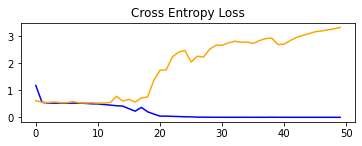

In [33]:
# plot loss
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='validation')


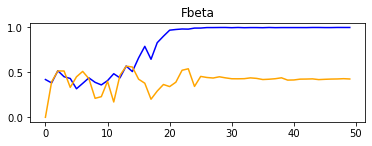

In [34]:
# plot accuracy
pyplot.subplot(212)
pyplot.title('Fbeta')
pyplot.plot(history.history['fbeta'], color='blue', label='train')
pyplot.plot(history.history['val_fbeta'], color='orange', label='validation')

## Improve Model 

### dropout regularization

In [39]:
# calculate fbeta score for multi-class/label classification
def fbeta(y_true, y_pred, beta=2):
    # clip predictions
    y_pred = backend.clip(y_pred, 0, 1)
    # calculate elements
    tp = backend.sum(backend.round(backend.clip(y_true * y_pred, 0, 1)), axis=1)
    fp = backend.sum(backend.round(backend.clip(y_pred - y_true, 0, 1)), axis=1)
    fn = backend.sum(backend.round(backend.clip(y_true - y_pred, 0, 1)), axis=1)
    # calculate precision
    p = tp / (tp + fp + backend.epsilon())
    # calculate recall
    r = tp / (tp + fn + backend.epsilon())
    # calculate fbeta, averaged across each class
    bb = beta ** 2
    fbeta_score = backend.mean((1 + bb) * (p * r) / (bb * p + r + backend.epsilon()))
    return fbeta_score

In [40]:
def define_model(in_shape=(400, 400, 3), out_shape=4):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=in_shape))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(out_shape, activation='sigmoid'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=[fbeta])
    return model

In [41]:
# create data generator
datagen = ImageDataGenerator(rescale=1.0/255.0)
# prepare iterators
train_it = datagen.flow(trainX, trainY, batch_size=32)
valid_it = datagen.flow(validX, validY, batch_size=32)
test_it = datagen.flow(testX, testY, batch_size=32)
# define model
model = define_model()

In [ ]:
# fit model
history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
    validation_data=test_it, validation_steps=len(test_it), epochs=50, verbose=1)
# evaluate model
loss, fbeta = model.evaluate_generator(test_it, steps=len(test_it), verbose=1)
print('> loss=%.3f, fbeta=%.3f' % (loss, fbeta))
# learning curves
summarize_diagnostics(history)

Epoch 1/50
